In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
customers_df = pd.read_csv("./Customers.csv")
products_df = pd.read_csv("./Products.csv")
transactions_df = pd.read_csv("./Transactions.csv")

In [3]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
print(customers_df.shape)
print(products_df.shape)
print(transactions_df.shape)

(200, 4)
(100, 4)
(1000, 7)


In [8]:
print(customers_df.info())
print("================================================")
print(products_df.info())
print("===============================================")
print(transactions_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [9]:
print(customers_df.isnull().sum())
print("=============================")
print(products_df.isnull().sum())
print("=============================")
print(transactions_df.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [10]:
print(customers_df.duplicated().sum())
print("=============================")
print(products_df.duplicated().sum())
print("=============================")
print(transactions_df.duplicated().sum())

0
0
0


In [11]:
customers_df.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [12]:
products_df.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [13]:
transactions_df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


## visualization

In [14]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'], errors='coerce')

# Customers Dataset
customers_summary = customers_df['Region'].value_counts()
signup_trends = customers_df['SignupDate'].dt.year.value_counts().sort_index()

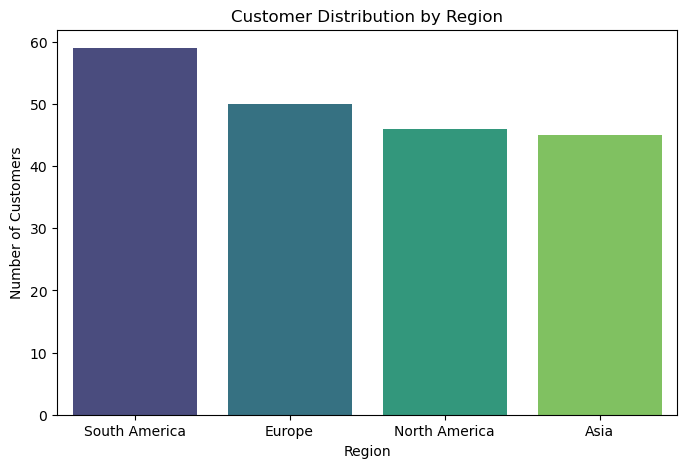

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x=customers_summary.index, y=customers_summary.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

### Insights

- We can see that we have highest number of customers from South America althought the Asia have largest population.
- This uneven distribution means that we have opportunity to expand the market in the other countries to grow customer base.

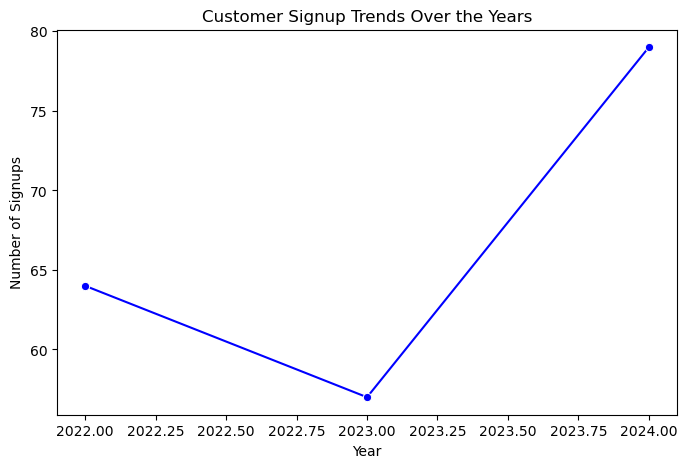

In [16]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=signup_trends.index, y=signup_trends.values, marker='o', color='blue')
plt.title("Customer Signup Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

- we can see that there is a upward trend in the customer signups.
- we have to identify the reason for this peak in 2024 for the consistent growth of the customer signups

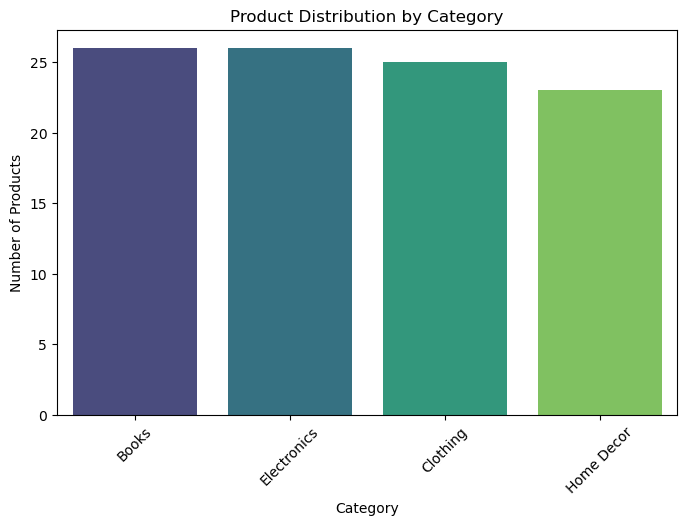

In [17]:
# Products Dataset
products_summary = products_df['Category'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=products_summary.index, y=products_summary.values, palette="viridis")
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

- product sales by category is almost same but Books and Electronics have the slight edge
- analyze the profitability and sales trend (like which catogory is more selling in which quarter of the year) to maintain the inventory diversification

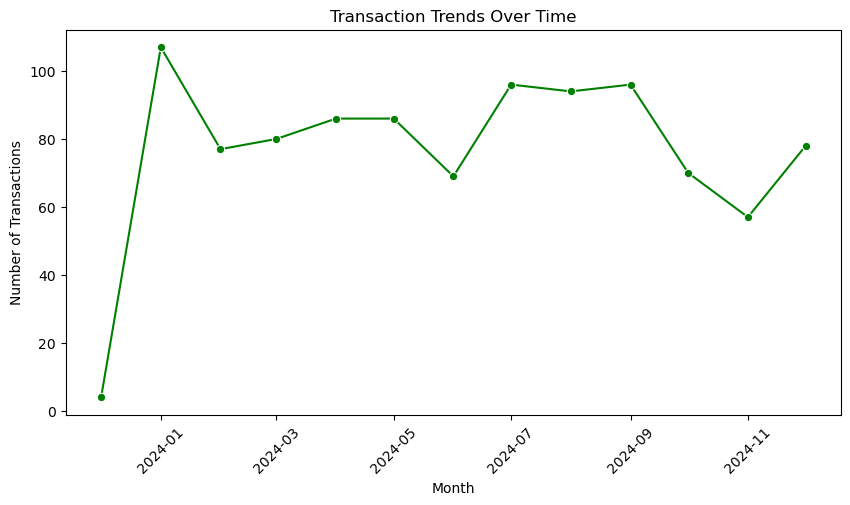

In [18]:
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], errors='coerce')

# Transactions Dataset
transaction_trends = transactions_df['TransactionDate'].dt.to_period("M").value_counts().sort_index()
# Transaction trends over time
plt.figure(figsize=(10, 5))
sns.lineplot(x=transaction_trends.index.to_timestamp(), y=transaction_trends.values, marker='o', color='green')
plt.title("Transaction Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

In [19]:
january_transactions = transactions_df[transactions_df['TransactionDate'].dt.month == 1]

january_sales = pd.merge(january_transactions, products_df, on='ProductID')
category_sales = january_sales.groupby('Category')['Quantity'].sum()
print(category_sales)

Category
Books          76
Clothing       54
Electronics    65
Home Decor     57
Name: Quantity, dtype: int64


In [20]:
november_transactions = transactions_df[transactions_df['TransactionDate'].dt.month == 11]

november_sales = pd.merge(november_transactions, products_df, on='ProductID')
category_sales = november_sales.groupby('Category')['Quantity'].sum()
print(category_sales)

Category
Books          37
Clothing       45
Electronics    48
Home Decor     17
Name: Quantity, dtype: int64


- we can see that the number of transactions peaks in january, consistent in July to September and dips in October and November.

- Promotional activities during peaks can maximize revenue.

- Loyalty program or exclusive perks for the repeated customers can further increases their lifetime value.